In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def read_system_info(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    info = {}
    for line in lines:
        # Check if there is more than one element after splitting
        if len(line.strip().split(': ')) == 2:
            key, value = line.strip().split(': ')
            info[key] = value

    return info


In [6]:
combined_dataframe=pd.DataFrame()
for file in os.listdir("Results"):
    file_name=file
    data=pd.read_csv("Results/"+file_name+'/'+file_name+'.csv')
    data['Type']=data["Device"]
    data['Device']=data['Device'].replace('cuda',read_system_info("Results/"+file_name+'/system_info.txt')['GPU name'])
    data['Device']=data['Device'].replace('cpu',read_system_info("Results/"+file_name+'/system_info.txt')['CPU name'])
    combined_dataframe=pd.concat([combined_dataframe,data],axis=0)

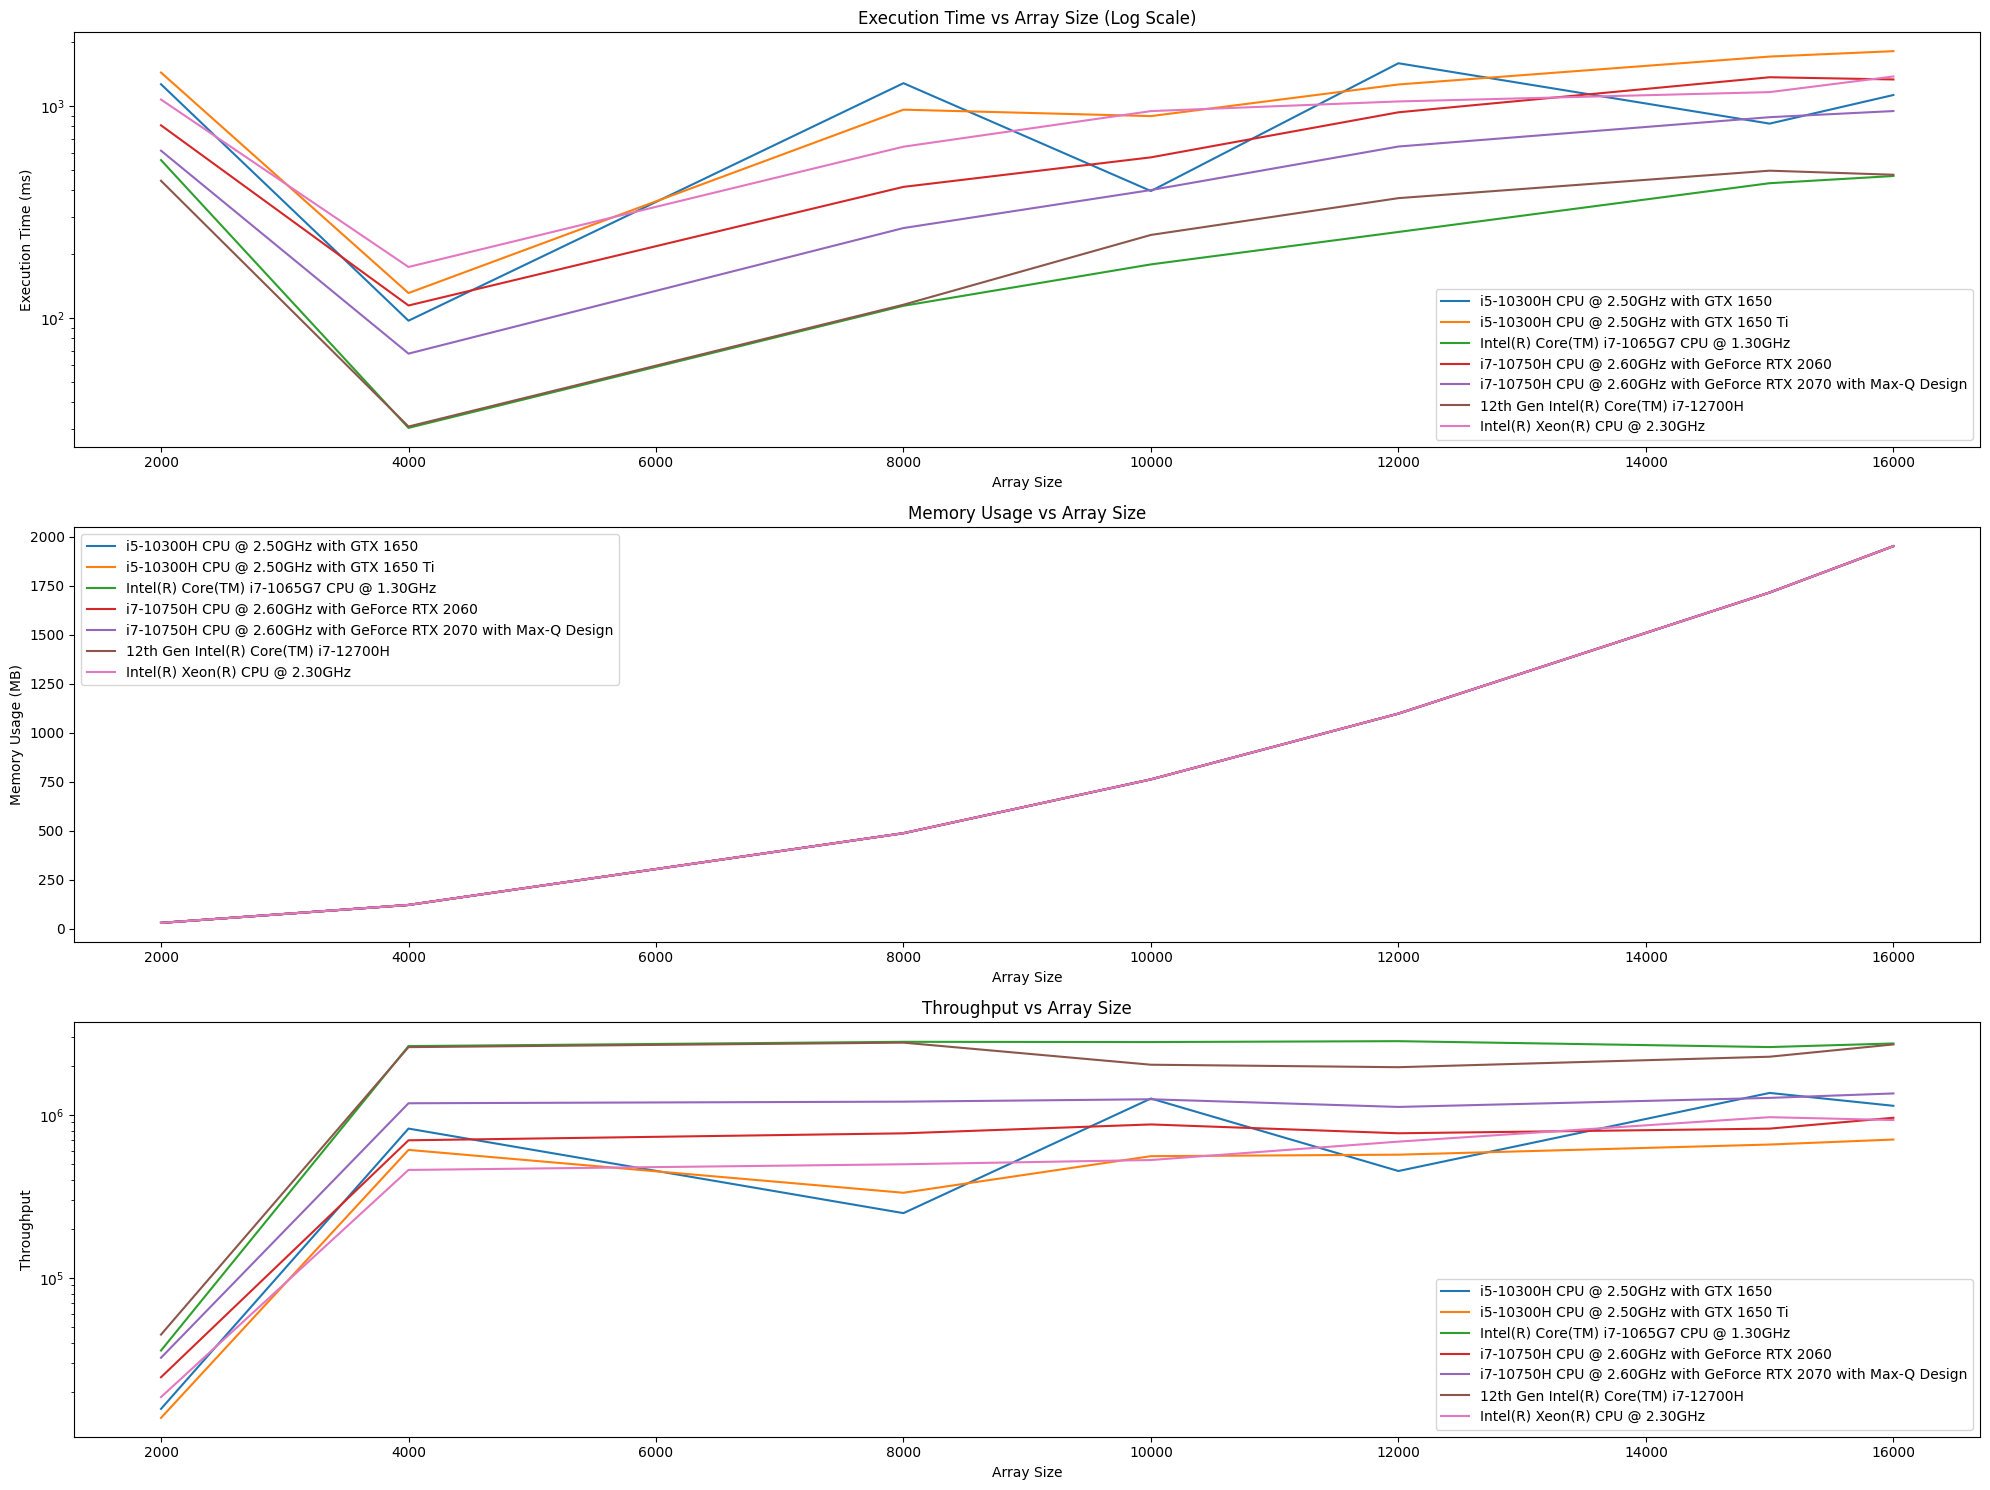

In [9]:

df=combined_dataframe[combined_dataframe['Type']=='cpu']
# Get unique devices
unique_devices = df['Device'].unique()


# Set up subplots
fig, axs = plt.subplots(3, 1, figsize=(20, 15))

# Plot Execution Time
axs[0].set_title('Execution Time vs Array Size (Log Scale)')
axs[0].set_xlabel('Array Size')
axs[0].set_ylabel('Execution Time (ms)')
for device in unique_devices:
    device_data = df[df['Device'] == device]
    axs[0].plot(device_data['Array Size'], device_data['Execution Time'], label=device)
axs[0].legend()
axs[0].set_yscale('log')

# Plot Memory Usage
axs[1].set_title('Memory Usage vs Array Size')
axs[1].set_xlabel('Array Size')
axs[1].set_ylabel('Memory Usage (MB)')
for device in unique_devices:
    device_data = df[df['Device'] == device]
    axs[1].plot(device_data['Array Size'], device_data['Memory Usage'], label=device)
axs[1].legend()

# Plot Throughput
axs[2].set_title('Throughput vs Array Size')
axs[2].set_xlabel('Array Size')
axs[2].set_ylabel('Throughput')
for device in unique_devices:
    device_data = df[df['Device'] == device]
    axs[2].plot(device_data['Array Size'], device_data['Throughput'], label=device)
axs[2].legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

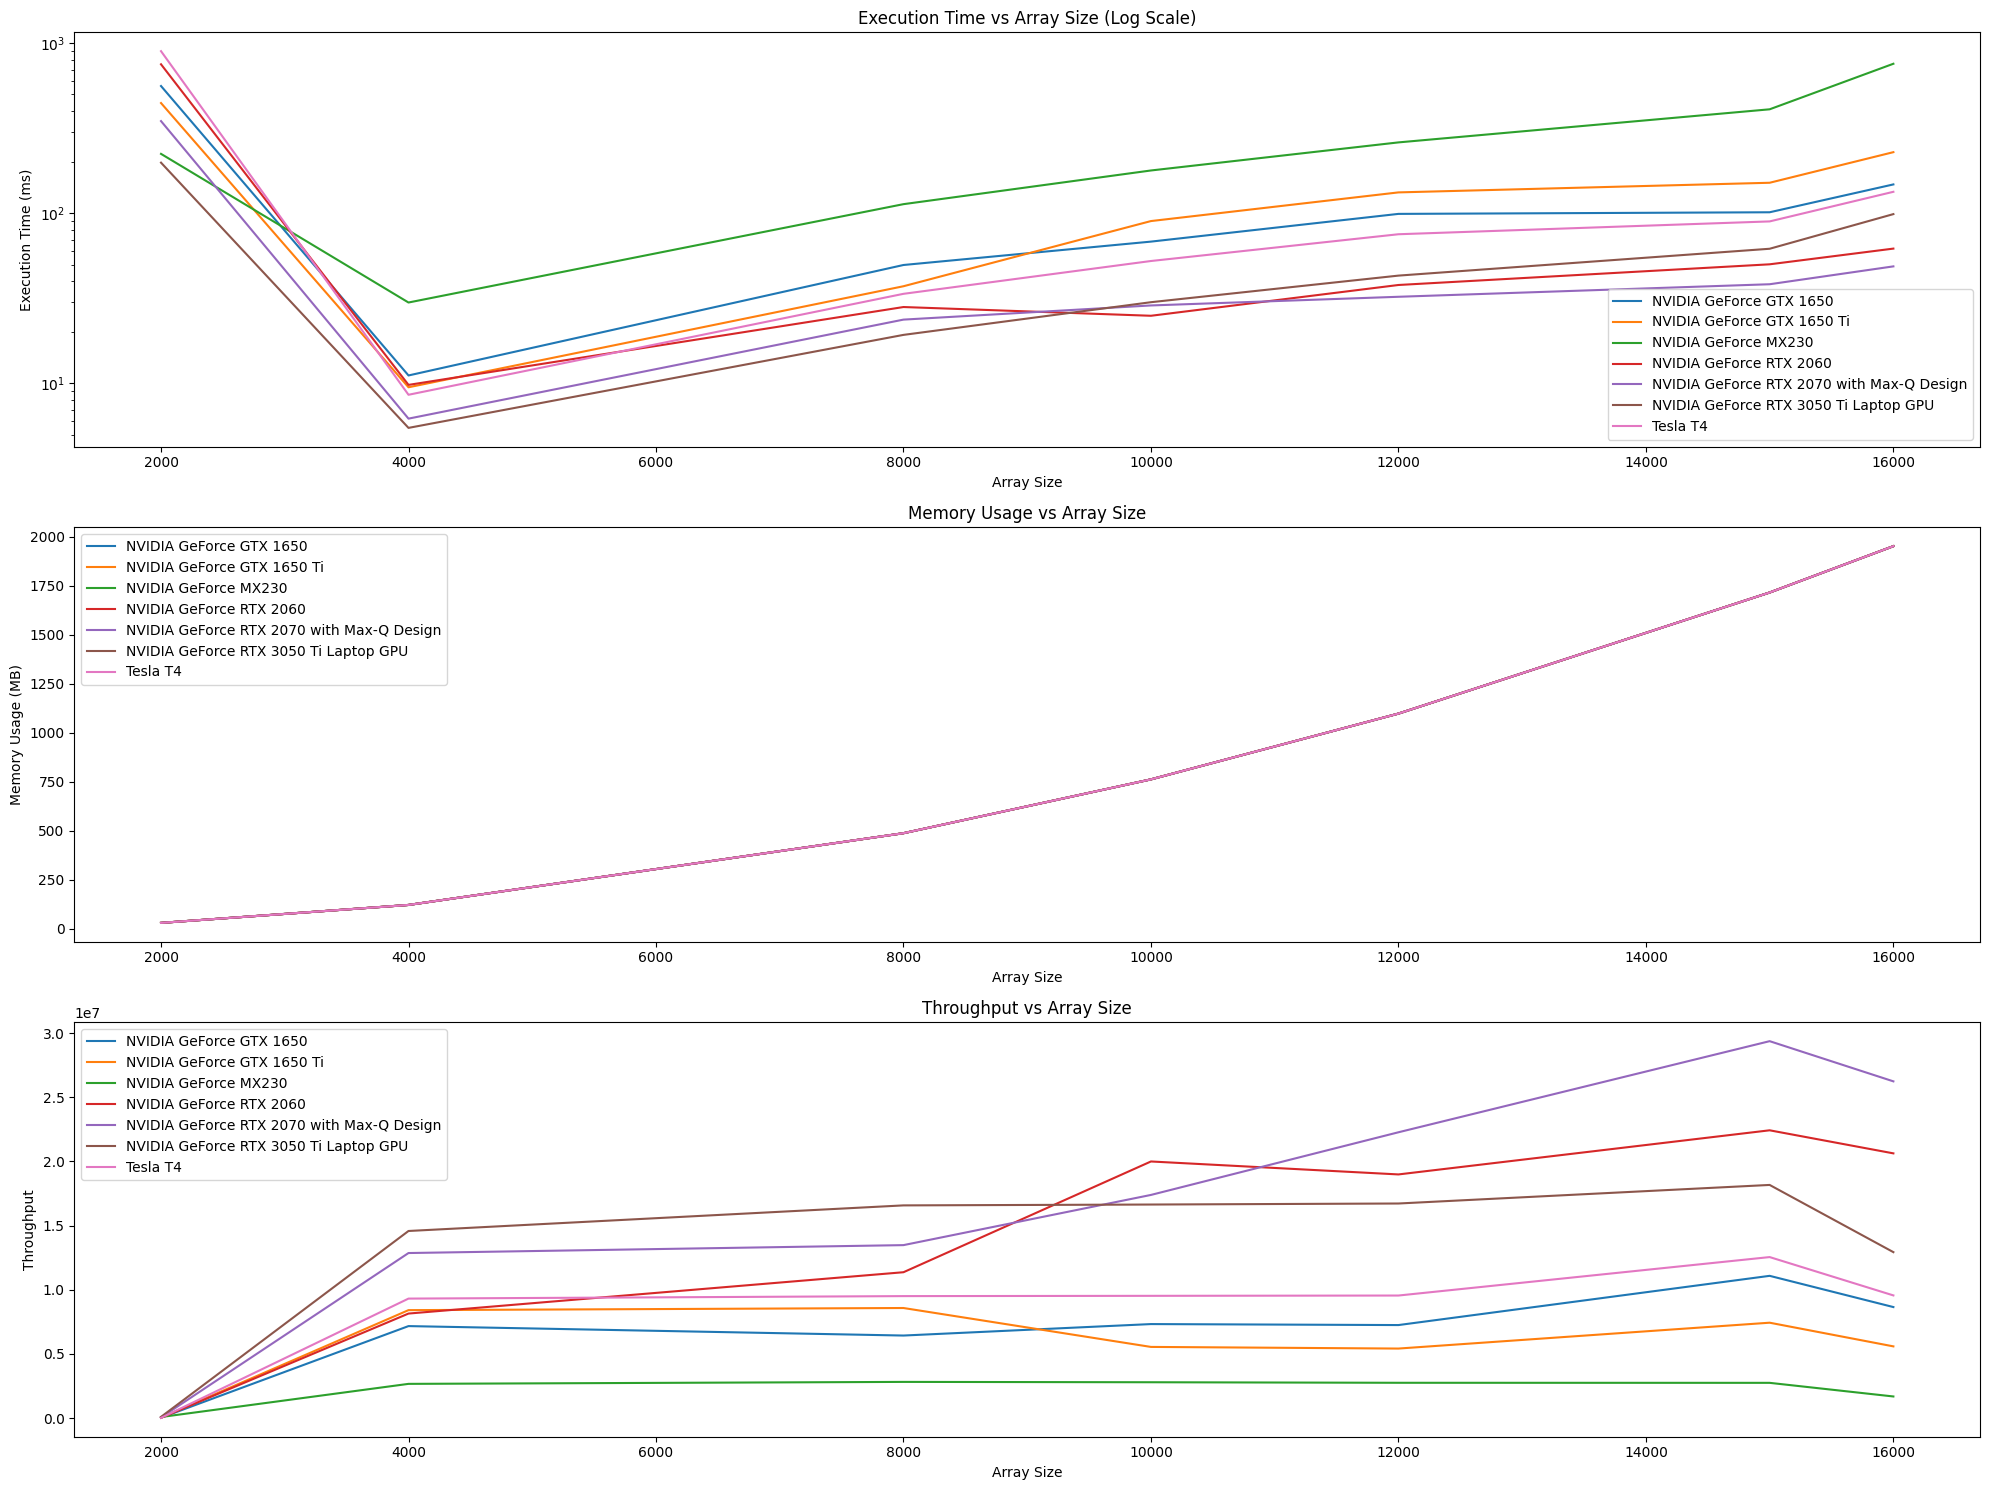

In [8]:

df=combined_dataframe[combined_dataframe['Type']=='cuda']
# Get unique devices
unique_devices = df['Device'].unique()


# Set up subplots
fig, axs = plt.subplots(3, 1, figsize=(20, 15))

# Plot Execution Time
axs[0].set_title('Execution Time vs Array Size (Log Scale)')
axs[0].set_xlabel('Array Size')
axs[0].set_ylabel('Execution Time (ms)')
for device in unique_devices:
    device_data = df[df['Device'] == device]
    axs[0].plot(device_data['Array Size'], device_data['Execution Time'], label=device)
axs[0].legend()
axs[0].set_yscale('log')

# Plot Memory Usage
axs[1].set_title('Memory Usage vs Array Size')
axs[1].set_xlabel('Array Size')
axs[1].set_ylabel('Memory Usage (MB)')
for device in unique_devices:
    device_data = df[df['Device'] == device]
    axs[1].plot(device_data['Array Size'], device_data['Memory Usage'], label=device)
axs[1].legend()

# Plot Throughput
axs[2].set_title('Throughput vs Array Size')
axs[2].set_xlabel('Array Size')
axs[2].set_ylabel('Throughput')
for device in unique_devices:
    device_data = df[df['Device'] == device]
    axs[2].plot(device_data['Array Size'], device_data['Throughput'], label=device)
axs[2].legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()